# Hierarcical clustering

There are two main approaches to hierarchical clustering: agglomerative (unifying) and divisive (dividing). In divisive hierarchical clustering, we start with a single cluster that spans all of our samples, and we iteratively split the cluster into smaller clusters until each cluster contains just one sample. In this section, we focus on agglomerative clustering, which takes the opposite approach. We start with each sample as a separate cluster and combine the closest pairs of clusters until only one cluster remains.
Agglomerative hierarchical clustering is represented by two standard algorithms: the single linkage method (also known as the nearest neighbor method) and the complete linkage method (also known as the far neighbor method). Using the single connection method, for each pair of clusters we calculate the distances between the most similar members and combine the two clusters for which the distance between the most similar members is the smallest. The full-link approach is similar to the single-link method, but instead of comparing the most similar members in each pair of clusters, to perform the union, we compare the most different members.

Consider agglomerative clustering, based on complete linkage method.

Algorithm:
1. Calculate the width matrix of all samples.
2. Present each data point as a singleton cluster.
3. Merge the two closest clusters.
4. Update the width matrix.
5. Repeat steps 2-4 until a single cluster remains.
Now we will discuss how to calculate the matrix width.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,7.996304,4.792821,6.368821
ID_1,1.094849,9.126090,1.955289
ID_2,5.694084,8.118930,6.514290
ID_3,1.205786,8.390786,1.930807
ID_4,1.138332,3.407904,2.247772


In [2]:
from scipy.spatial.distance import pdist, squareform 
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')), columns=labels, index=labels)

In [3]:
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,9.267501,4.047763,8.874258,8.119903
ID_1,9.267501,0.000000,6.553764,0.744028,5.725826
ID_2,4.047763,6.553764,0.000000,6.420828,7.819962
ID_3,8.874258,0.744028,6.420828,0.000000,4.993408
ID_4,8.119903,5.725826,7.819962,4.993408,0.000000


In [4]:
from scipy.cluster.hierarchy import linkage

In [5]:
row_clusters = linkage(pdist(df, metric='euclidean'),method='complete')

In [6]:
df2 = pd.DataFrame(row_clusters, columns = ['Elem_1', 'Elem_2','dist','Number of elements']
                                     , index=[i for i in range(len(row_clusters))])

Elem_1, Elem_2 - more distant elements firm each othet in one class. Dist - distance between them.

# Dendrogram

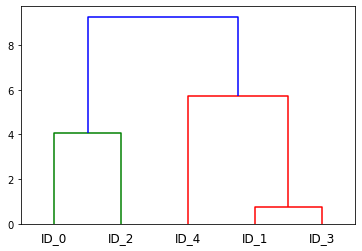

In [7]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters, labels=labels)

# Heatmap

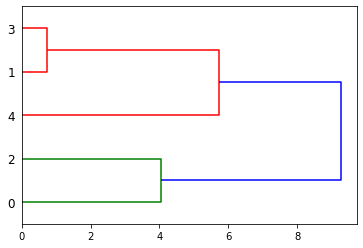

In [8]:
row_dendr = dendrogram(row_clusters, orientation='right')

In [39]:
df_rowclust = df.ix[row_dendr['leaves'][::-1]]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [40]:
df_rowclust

,X,Y,Z
ID_4,5.249716,1.094132,5.347183
ID_2,5.996640,7.110140,8.871650
ID_0,8.219337,4.366969,2.145839
ID_3,7.444096,1.138456,3.663271
ID_1,7.885984,9.335413,3.076728


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


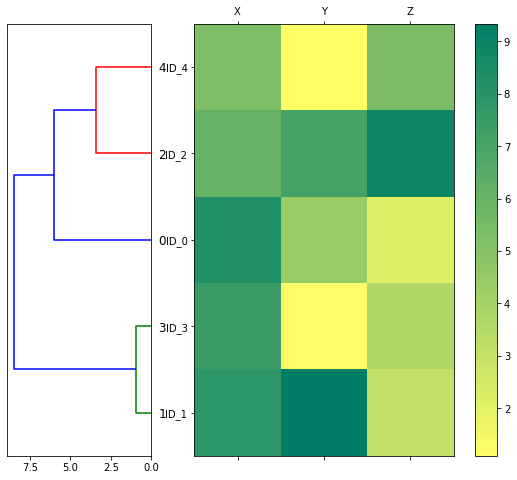

In [44]:
fig = plt.figure(figsize= (10,10), facecolor='white')
axd = fig.add_axes([0.09, 0.1,0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation='left')

axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap='summer_r')
fig.colorbar(cax)
axm.set_xticklabels([' '] + list(df_rowclust.columns)) 
axm.set_yticklabels([' '] + list(df_rowclust.index))

fig.show()


# Realisation in scikit-learn

In [45]:
from sklearn.cluster import AgglomerativeClustering 
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Метки кластеров: %s' % labels)

Метки кластеров: [0 0 0 1 1]


In [46]:
X

array([[8.21933747, 4.36696904, 2.14583944],
       [7.88598391, 9.33541292, 3.07672819],
       [5.99664045, 7.11014014, 8.87165005],
       [7.44409637, 1.13845567, 3.66327097],
       [5.24971633, 1.09413196, 5.34718344]])